### Classificació de Fruites amb Transfer Learning utilitzant VGG16

En aquest cas presentem un codi per a entrenar un model de xarxa neuronal convolucional basat en **VGG16** per a classificar imatges en 6 categories diferents de fruites. A continuació, es detallen els passos implementats:

#### Objectius
1. **Preprocessament de les imatges**: 
   - Escalat de les imatges i augmentació mitjançant tècniques com:
     - Rotacions aleatòries
     - Desplaçaments horitzontals i verticals
     - Canvis d'escala i reflexions horitzontals
   - Aquest procés ajuda a millorar la generalització del model i evita el sobreajustament.

2. **Configuració del model VGG16**:
   - Utilització del model preentrenat **VGG16** sense les capes de classificació finals (`include_top=False`).
   - Congelació de les capes convolucionals del model per mantenir els pesos preentrenats.
   - Afegir noves capes:
     - Una capa de **Flatten** per aplanar les característiques convolucionals.
     - Una capa densament connectada (**Dense**) amb 256 neurones i funció d'activació `ReLU`.
     - Una capa de sortida amb **6 neurones** i funció d'activació `softmax` per predir les 6 categories de fruites.

3. **Entrenament del model**:
   - Compilació amb l'optimitzador Adam, funció de pèrdua `categorical_crossentropy`, i mètrica `accuracy`.
   - Entrenament durant **10 èpoques** amb augmentació de dades per millorar la robustesa del model.

4. **Emmagatzematge del model**:
   - Guardar el model entrenat en un fitxer anomenat `model_fruita_vgg16New.h5` per reutilitzar-lo en aplicacions futures.

5. **Visualització dels resultats**:
   - Generació de gràfics que mostren l'evolució de la precisió i la pèrdua durant l'entrenament.

#### Resultats esperats
- Un model capaç de classificar imatges de fruites en 6 categories amb alta precisió.
- Visualització clara del rendiment mitjançant gràfics de precisió i pèrdua.

A continuació, es presentarà el codi complet per a implementar aquest procés.


Found 10901 images belonging to 6 classes.
Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 665s 2s/step - accuracy: 0.7122 - loss: 1.1219
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 17us/step - accuracy: 0.7812 - loss: 0.7449 
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.9108 - loss: 0.2465
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 9us/step - accuracy: 0.9062 - loss: 0.2718  
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.9175 - loss: 0.2286
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 16us/step - accuracy: 0.9375 - loss: 0.1345 
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 667s 2s/step - accuracy: 0.9269 - loss: 0.2079
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 11us/step - accuracy: 0.9688 - loss: 0.1360
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.9419 - loss: 0.1561
Epoch 10/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 15us/step - accuracy: 0.9688 - loss: 0.0509 


Modelo guardado como 'model_fruita_vgg16New.h5'.


KeyError: 'val_accuracy'

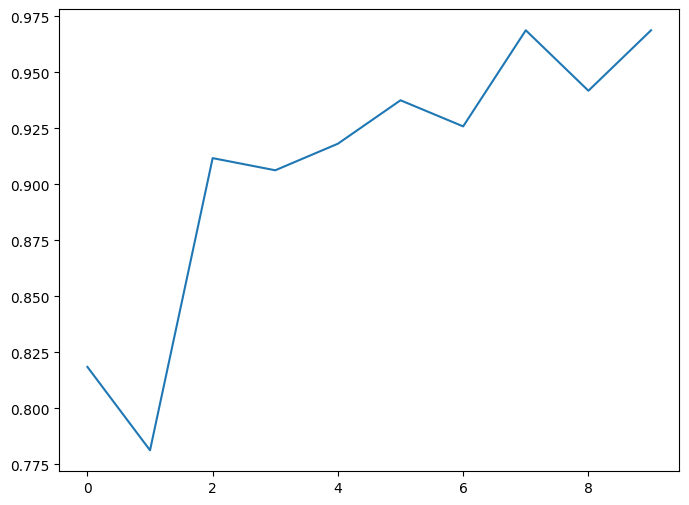

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Configuración de los generadores de datos
train_dir = './.gitignore/dataset/train/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Cargar el modelo VGG16 preentrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(6, activation='softmax')(x)  # 6 clases

model = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

# Guardar el modelo entrenado
model.save('model_fruita_vgg16New.h5')
print("Modelo guardado como 'model_fruita_vgg16New.h5'.")

### Explicació dels Canvis Realitzats

#### Creació de la Figura i Eixos
- Utilització de `plt.subplots()` per crear una figura amb un eix principal (`ax1`) per mostrar la precisió durant l'entrenament.

#### Plotatge de la Precisió
- Assignat color blau (`tab:blue`) per representar la precisió.
- Etiquetes:
  - **Eix X**: 'Època'.
  - **Eix Y** (primari): 'Precisió'.
- Plotat de `history.history['accuracy']`.

#### Creació del Segon Eix Y i Plotatge de la Pèrdua
- Creat un segon eix Y (`ax2`) amb `ax1.twinx()` per compartir l'eix X amb l'eix primari.
- Assignat color vermell (`tab:red`) per representar la pèrdua.
- Etiqueta:
  - **Eix Y** (secundari): 'Pèrdua'.
- Plotat de `history.history['loss']`.

#### Llegenda i Títol
- Integrades les llegendes de precisió i pèrdua per facilitar la interpretació.
- Assignat títol: **'Precisió i Pèrdua durant l'Entrenament'**.

#### Ajustament del Layout
- Utilització de `fig.tight_layout()` per evitar solapaments i millorar la distribució visual del gràfic.


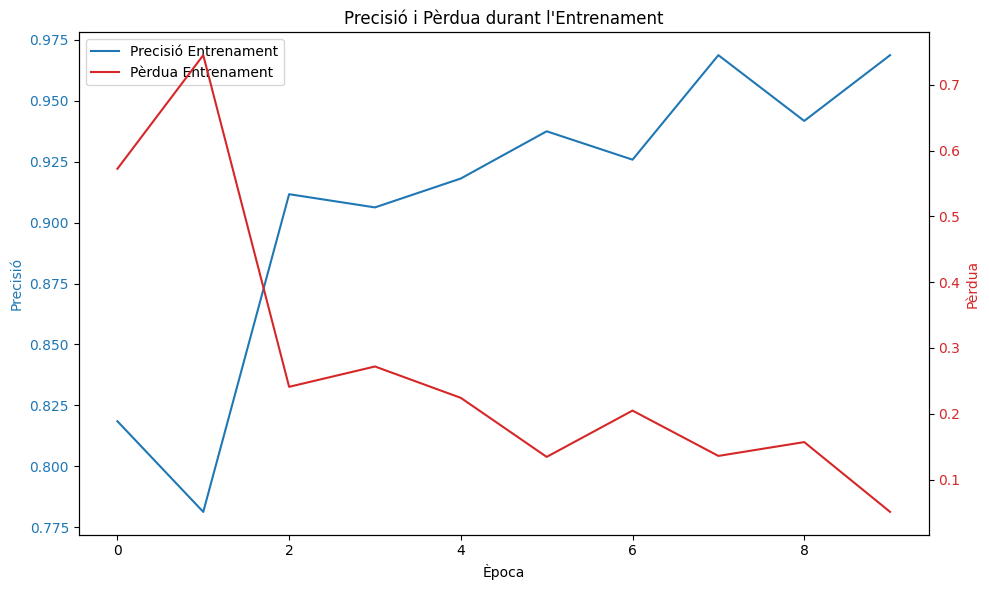

In [10]:
import matplotlib.pyplot as plt

# Crear una figura i un eix principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot de la precisió
color = 'tab:blue'
ax1.set_xlabel('Època')
ax1.set_ylabel('Precisió', color=color)
ax1.plot(history.history['accuracy'], color=color, label='Precisió Entrenament')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segon eix Y per a la pèrdua
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Pèrdua', color=color)
ax2.plot(history.history['loss'], color=color, label='Pèrdua Entrenament')
ax2.tick_params(axis='y', labelcolor=color)

# Afegir el títol
plt.title('Precisió i Pèrdua durant l\'Entrenament')

# Combinar les llegendes dels dos eixos
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Ajustar el layout per evitar solapaments
fig.tight_layout()

# Mostrar el gràfic
plt.show()

### Avaluació del Model de Classificació de Fruites

Aquest codi està dissenyat per avaluar un model de classificació de fruites basat en **VGG16** utilitzant un conjunt de dades de prova. L'objectiu és mesurar el rendiment del model en termes de precisió, pèrdua i altres mètriques d'avaluació. A continuació, es descriu el procés implementat:

1. Configuració dels Generadors de Dades
- S'utilitza `ImageDataGenerator` per preprocessar les imatges del conjunt de dades de prova:
  - Es redimensionen a 224x224 píxels.
  - S'aplica una normalització rescalant els valors dels píxels a l'interval `[0, 1]`.
  - La configuració de `shuffle=False` assegura que les prediccions mantinguin el mateix ordre que les dades d'entrada.

2. Càrrega del Model Entrenat
- El model preentrenat es carrega des de l'arxiu `model_fruita_vgg16New.h5`, assegurant així que s'utilitza la mateixa arquitectura i pesos obtinguts durant l'entrenament.

3. Avaluació del Model
- Es calcula la precisió i la pèrdua del model sobre el conjunt de dades de prova mitjançant el mètode `evaluate`.
- Es genera una sortida amb les mètriques obtingudes.

4. Generació de Prediccions
- Es realitzen prediccions sobre les dades de prova:
  - Les prediccions s'obtenen en forma de probabilitats per classe.
  - Es converteixen a etiquetes de classe mitjançant `np.argmax`.

5. Informe de Classificació
- S'utilitza `classification_report` de **scikit-learn** per generar un informe detallat que inclou:
  - Precisión.
  - Exhaustivitat (recall).
  - F1-score.
  - Suport per a cada classe.

6. Visualització de la Matriu de Confusió
- Es genera una **matriu de confusió** que compara les prediccions del model amb les etiquetes veritables.
- Es visualitza utilitzant una mapa de calor (`heatmap`) amb la biblioteca **seaborn** per facilitar la interpretació.

Aquest enfocament permet avaluar detalladament el rendiment del model i identificar possibles millores per a futures iteracions.


Found 2698 images belonging to 6 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Modelo cargado exitosamente.
84/84 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9836 - loss: 0.0470
Precisión en el test: 0.9766
Pérdida en el test: 0.0640
85/85 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step
Informe de Clasificación
               precision    recall  f1-score   support

  freshapples       0.94      0.99      0.97       395
  freshbanana       0.98      1.00      0.99       381
 freshoranges       0.99      0.95      0.97       388
 rottenapples       0.97      0.97      0.97       601
 rottenbanana       1.00      1.00      1.00       530
rottenoranges       0.96      0.95      0.96       403

     accuracy                           0.98      2698
    macro avg       0.98      0.98      0.98      2698
 weighted avg       0.98      0.98      0.98      2698



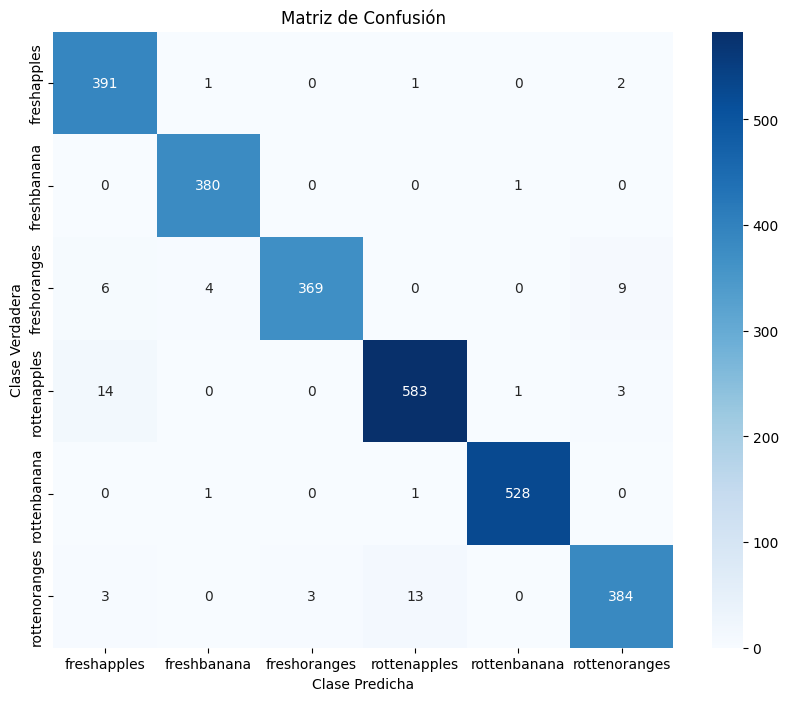

In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuración de los generadores de datos
test_dir = './.gitignore/dataset/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Importante para mantener el orden de las predicciones
)

# Cargar el modelo entrenado
model = load_model('model_fruita_vgg16New.h5')
print("Modelo cargado exitosamente.")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Precisión en el test: {test_acc:.4f}')
print(f'Pérdida en el test: {test_loss:.4f}')

# Generar predicciones
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener los nombres de las clases
class_names = list(test_generator.class_indices.keys())

# Informe de Clasificación
print('Informe de Clasificación')
print(classification_report(y_true, y_pred, target_names=class_names))

# Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()

### Resultats Obtinguts: Avaluació del Model

L'avaluació del model entrenat sobre el conjunt de dades de prova ha donat lloc a resultats excel·lents, reflectint una alta precisió en les prediccions i una pèrdua baixa. Aquest rendiment indica que el model és altament efectiu en la tasca de classificació d'imatges de fruites fresques i podrides. A continuació es detallen els resultats:

1. **Mètriques Globals**
- **Precisión en el test:** `0.9766`
- **Pèrdua en el test:** `0.0640`

Aquestes mètriques reflecteixen la capacitat del model per fer prediccions correctes en gairebé el 98% dels casos i amb una pèrdua molt baixa. Això suggereix que el model té un bon equilibri entre la precisió i la capacitat de generalització sobre dades no vistes.

2. **Informe de Classificació**
A la taula superior podem observar els diferents valors precision, recall, f1-score i support. 
- Les classes amb millor rendiment són **rottenbanana** i **freshbanana**, amb un F1-Score de `1.00` i una precisió perfecte.
- Les classes amb un rendiment lleugerament inferior són **freshapples** i **rottenoranges**, amb un F1-Score de `0.97` i `0.96`, respectivament.

3. **Matriu de Confusió**
La matriu de confusió mostra la distribució de les prediccions correctes i errònies per a cada classe. Aquesta visualització permet identificar possibles confusions entre classes similars. Observem que entre **freshaapples** i **rottenapples** hi ha un augment dels errors i entre **rottenapples** i **rottenoranges** també. 

## Conclusió
Els resultats mostren que el model és capaç de classificar les imatges de fruites amb una precisió i exhaustivitat molt alta, fet que el fa adequat per a aplicacions pràctiques. Tanmateix, es podrien explorar millores en la classificació de classes lleugerament més complexes, com **freshapples** i **rottenoranges**.
